In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import helper
from helper import *

current_path = os.getcwd()
data_directory = os.path.join(current_path, "data")
os.makedirs(data_directory, exist_ok=True)

In [3]:
stock_data = {}
for stock in STOCKS:
    try:
        data_path = os.path.join(data_directory, f"{stock}_{START_DATE}_{END_DATE}.csv")
        if not os.path.exists(data_path):
            data = yf.download(stock, start=START_DATE, end=END_DATE)
            data = data.reset_index()
            data['Date'] = pd.to_datetime(data['Date'])
            data.to_csv(data_path, index=False)
        else:
            data = pd.read_csv(data_path)
            data['Date'] = pd.to_datetime(data['Date'])
        stock_data[stock] = data
        
        print(f"Data fetched and saved for {stock}")
    except Exception as e:
        print(f"Error fetching data for {stock}: {str(e)}")

[*********************100%%**********************]  1 of 1 completed
Data fetched and saved for RIVN
[*********************100%%**********************]  1 of 1 completed
Data fetched and saved for BB
[*********************100%%**********************]  1 of 1 completed
Data fetched and saved for SOFI
[*********************100%%**********************]  1 of 1 completed
Data fetched and saved for GME
[*********************100%%**********************]  1 of 1 completed
Data fetched and saved for AMC
[*********************100%%**********************]  1 of 1 completed
Data fetched and saved for PLTR
[*********************100%%**********************]  1 of 1 completed
Data fetched and saved for TSLA
[*********************100%%**********************]  1 of 1 completed
Data fetched and saved for AAPL
[*********************100%%**********************]  1 of 1 completed
Data fetched and saved for MSFT
[*********************100%%**********************]  1 of 1 completed
Data fetched and saved for

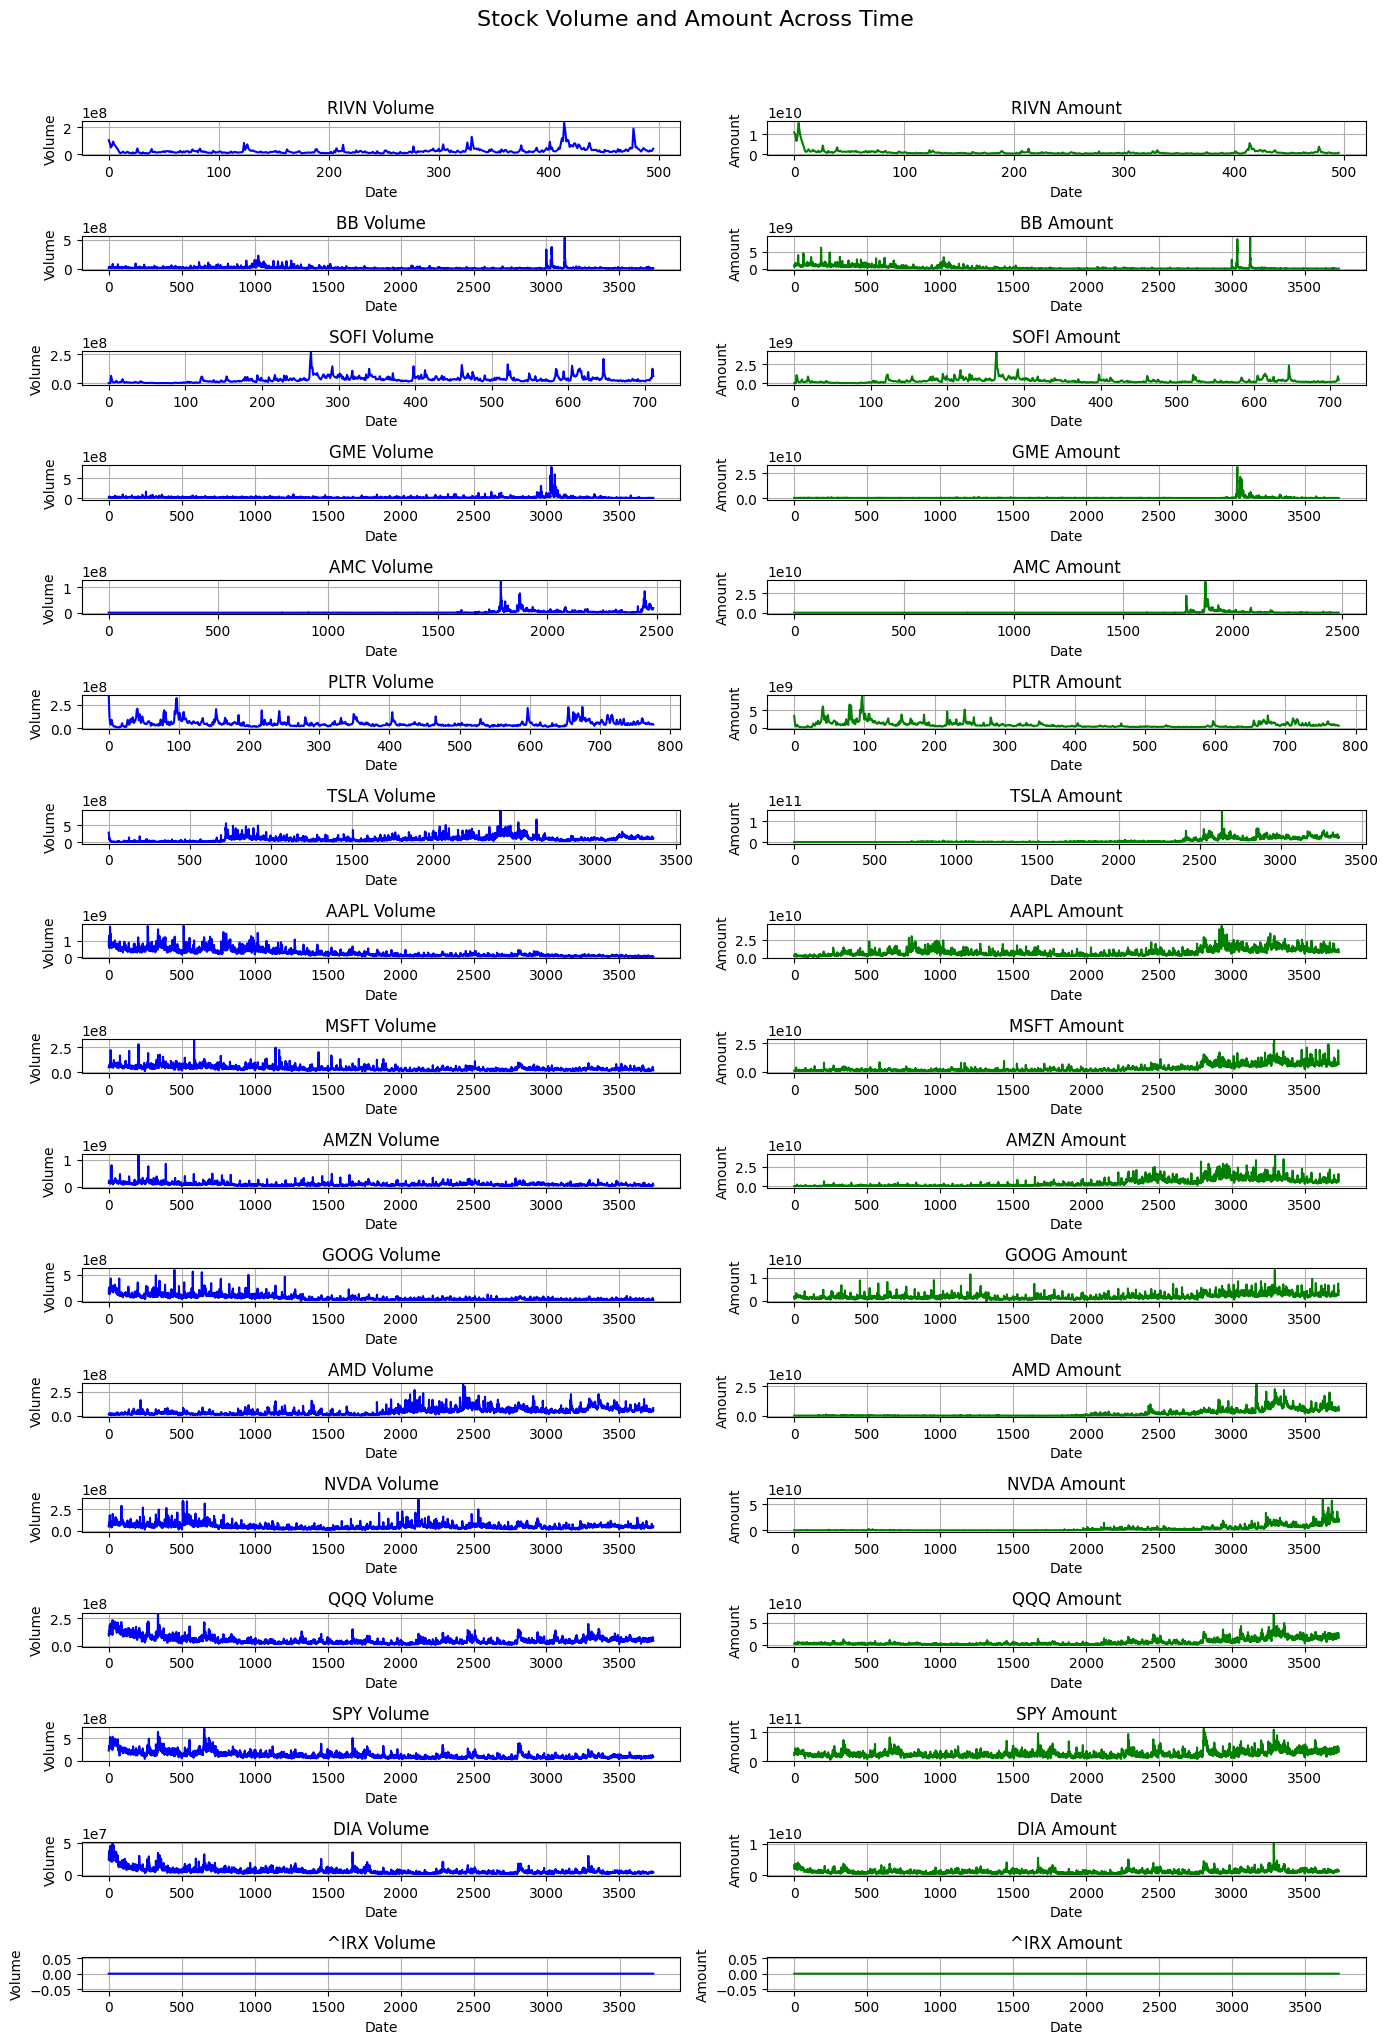

In [4]:
fig, axes = plt.subplots(len(stock_data), 2, figsize=(14, 20))

fig.suptitle('Stock Volume and Amount Across Time', fontsize=16, y=1.02)

for i, stock in enumerate(stock_data.keys()):
    try:
        data = stock_data[stock]
        data['Amount'] = (data['Open'] + data['High'] + data['Low'] + data['Close']) / 4 * data['Volume']
        axes[i, 0].plot(data.index, data['Volume'], label='Volume', color='blue')
        axes[i, 0].set_title(f'{stock} Volume', fontsize=12)
        axes[i, 0].set_xlabel('Date')
        axes[i, 0].set_ylabel('Volume')
        axes[i, 0].grid(True)
        axes[i, 1].plot(data.index, data['Amount'], label='Amount', color='green')
        axes[i, 1].set_title(f'{stock} Amount', fontsize=12)
        axes[i, 1].set_xlabel('Date')
        axes[i, 1].set_ylabel('Amount')
        axes[i, 1].grid(True)
        
    except Exception as e:
        print(f"Error plotting data for {stock}: {str(e)}")

plt.tight_layout()
plt.show()


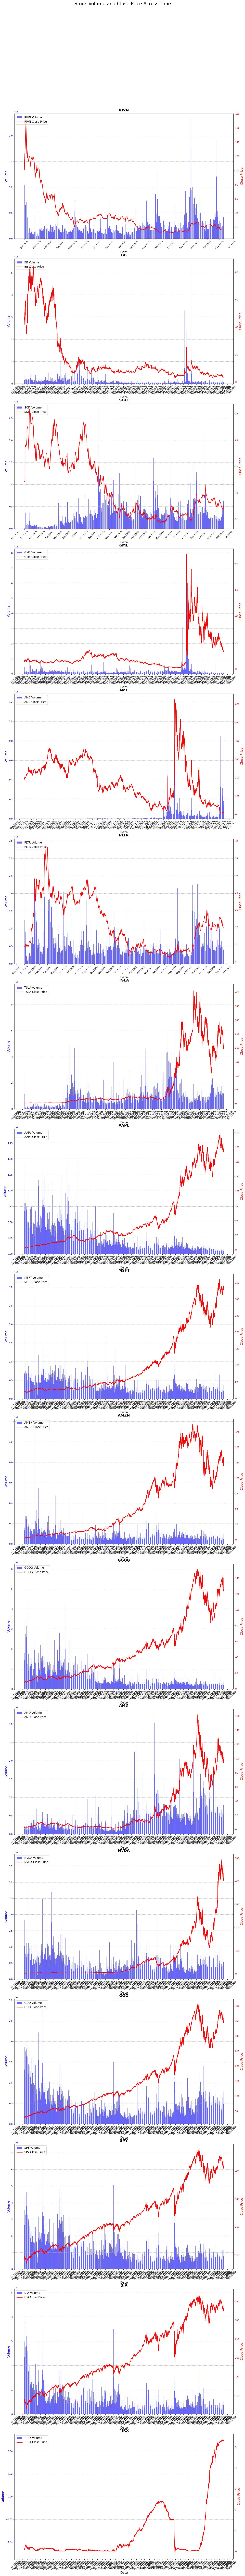

In [5]:
fig, axes = plt.subplots(len(stock_data), figsize=(15, 10*len(stock_data)))

fig.suptitle('Stock Volume and Close Price Across Time', fontsize=20, y=0.92)

for i, stock in enumerate(stock_data.keys()):
    try:
        # Access the stock's data from the dictionary
        data = stock_data[stock]
        
        # Plot 'Volume' on the primary y-axis
        axes[i].bar(data.index, data['Volume'], label=f'{stock} Volume', color='blue', alpha=0.6)
        axes[i].set_xlabel('Date', fontsize=14)
        axes[i].set_ylabel('Volume', color='blue', fontsize=14)
        axes[i].grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
        axes[i].tick_params(axis='y', labelcolor='blue')
        axes[i].xaxis.set_major_locator(mdates.MonthLocator())  # Set locator to month
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format date to month and year
        axes[i].tick_params(axis='x', rotation=45)  # Rotate date labels for better readability
        
        # Create a secondary y-axis for 'Close Price'
        ax2 = axes[i].twinx()
        ax2.plot(data.index, data['Close'], label=f'{stock} Close Price', color='red', linewidth=2)
        ax2.set_ylabel('Close Price', color='red', fontsize=14)
        ax2.tick_params(axis='y', labelcolor='red')
        
        # Show legends for 'Volume' and 'Close Price'
        lines1, labels1 = axes[i].get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        axes[i].legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)
        
        axes[i].set_title(f'{stock}', fontsize=16, fontweight='bold', pad=10)
        
    except Exception as e:
        print(f"Error plotting data for {stock}: {str(e)}")

plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust the top spacing to accommodate the suptitle
plt.show()
